### Importy bibliotek

In [92]:
import kaggle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

### Wczytywanie danych

In [95]:
DATA_PATH = './data/'

#Bar plot
drivers = pd.read_csv(DATA_PATH + 'drivers.csv', usecols=['driverId', 'forename', 'surname', 'nationality'])
driver_standings = pd.read_csv(DATA_PATH + 'driver_standings.csv', usecols=['driverId', 'position', 'wins'])

### Wykres słupkowy | Liczba zwycięstw kierowców z top 30 krajów

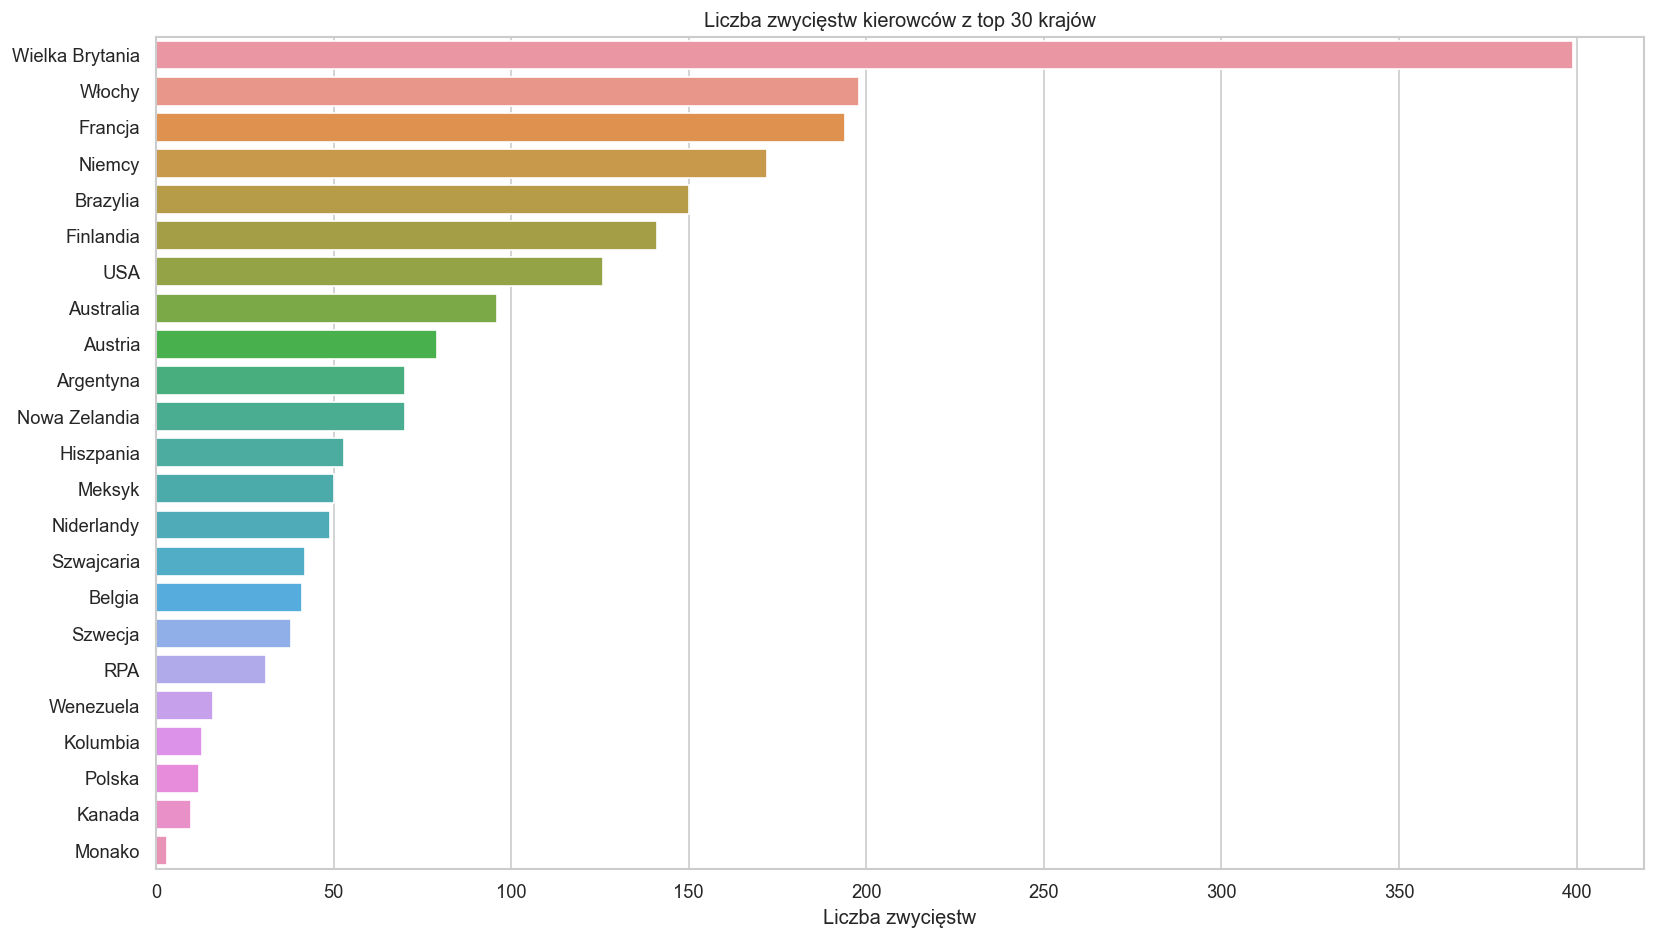

In [107]:
import kaggle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
DATA_PATH = './data/'

#Bar plot
drivers = pd.read_csv(DATA_PATH + 'drivers.csv', usecols=['driverId', 'forename', 'surname', 'nationality'])
driver_standings = pd.read_csv(DATA_PATH + 'driver_standings.csv', usecols=['driverId', 'position', 'wins'])

driver_wins = driver_standings[driver_standings['wins'] == 1]
data = pd.merge(drivers, driver_wins, on='driverId')

win_counts = data.groupby('nationality')['wins'].sum()
total_counts = data['nationality'].value_counts()
win_percents = (win_counts / total_counts) * 100

rename_dict = {'American': 'USA', 'Italian': 'Włochy', 'French': 'Francja', 'Argentine': 'Argentyna', 'Australian': 'Australia', 'Austrian': 'Austria',
               'Belgian': 'Belgia', 'Brazilian': 'Brazylia', 'British': 'Wielka Brytania', 'Canadian': 'Kanada', 'German': 'Niemcy', 'Finnish': 'Finlandia',
               'Colombian': 'Kolumbia', 'Dutch': 'Niderlandy', 'New Zealander': 'Nowa Zelandia', 'Spanish': 'Hiszpania', 'Mexican': 'Meksyk', 'Swiss': 'Szwajcaria',
               'Swedish': 'Szwecja', 'South African': 'RPA', 'Venezuelan': 'Wenezuela', 'Polish': 'Polska', 'Monegasque': 'Monako'}

top_nationalities = win_counts.nlargest(30).index.tolist()
top_nationalities_renamed = [rename_dict.get(nat, nat) for nat in top_nationalities]
win_counts_top = win_counts.loc[top_nationalities]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
sns.barplot(x=win_counts_top, y=top_nationalities_renamed, ax=ax)
plt.title('Liczba zwycięstw kierowców z top 30 krajów')
plt.xlabel('Liczba zwycięstw')
plt.show()

### Wykres kołowy